Результат градиентного спуска:
w (наклон) = 5.08623, b (смещение) = 0.07854
Количество итераций: 19

Результат нормального уравнения (МНК):
w (наклон) = 5.00828, b (смещение) = 5.38910


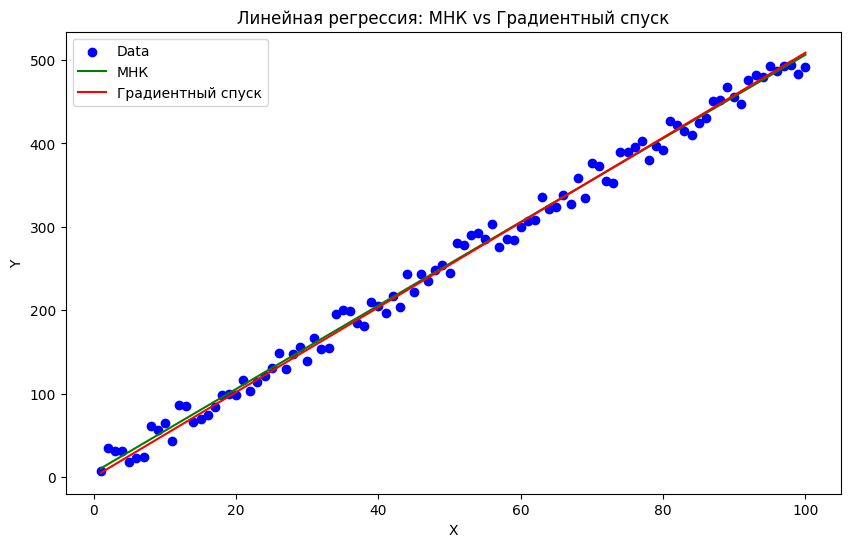

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Генерируем данные: X от 1 до 100, Y = 5*X + 7 + шум
X = np.arange(1, 101)
noise = np.random.uniform(-20, 20, size=X.shape)
Y = 5 * X + 7 + noise
n = len(X)

def loss(w, b):
    return np.sum((w * X + b - Y) ** 2) / (2 * n)

def gradients(w, b):
    grad_w = -np.sum(X * (Y - (w * X + b))) / n
    grad_b = -np.sum(Y - (w * X + b)) / n
    return grad_w, grad_b

# Градиентный спуск
w, b = 0.0, 0.0 # нач значение наклона
lr = 0.0001 # нач знач смещения
tol = 0.001 # скорост обучения
max_iter = 100000 # критерий сходимости
iter = 0

while iter < max_iter:
    grad_w, grad_b = gradients(w, b)
    new_w = w - lr * grad_w
    new_b = b - lr * grad_b
    # останавливаемся, если норма разницы между текущими и новыми параметрами меньше tolerance
    if np.sqrt((new_w - w) ** 2 + (new_b - b) ** 2) < tol:
        w, b = new_w, new_b
        break
    w, b = new_w, new_b
    iter += 1

print("Результат градиентного спуска:")
print("w (наклон) = {:.5f}, b (смещение) = {:.5f}".format(w, b))
print("Количество итераций:", iteration)

# Решение МНК через нормальное уравнение
X_design = np.vstack([X, np.ones(n)]).T
theta_best = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ Y)
w_norm, b_norm = theta_best

print("\nРезультат нормального уравнения (МНК):")
print("w (наклон) = {:.5f}, b (смещение) = {:.5f}".format(w_normal, b_normal))

# график
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, w_norm * X + b_norm, color='green', label='МНК')
plt.plot(X, w * X + b, color='red', label='Градиентный спуск')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная регрессия: МНК vs Градиентный спуск')
plt.legend()
plt.show()
